In [167]:
import numpy as np
from scipy.linalg import svd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [168]:
def lorenz(t, u, p):
    # --> Unpack parameters
    σ, ρ, β = p
    
    # Unpack states.
    x, y, z = u
    
    # --> Lorenz system.
    dx = σ * (y - x)
    dy = x * (ρ - z) - y
    dz = x*y - β*z
    
    return dx, dy, dz

In [169]:
tspan = (0.0, 100.0)
t = np.linspace(*tspan, 10001)
Δt = t[1] - t[0]
u0 = np.random.randn(3)
p = σ, ρ, β = 10.0, 28.0, 8/3

output = solve_ivp(
    lambda t, u : lorenz(t, u, p),
    tspan,
    u0,
    t_eval=t
)

In [170]:
obs = output["y"][0]

(40.0, 60.0)

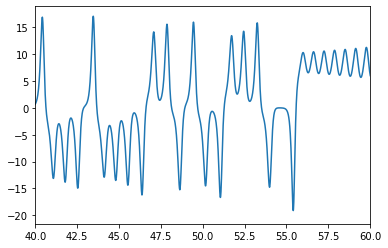

In [171]:
plt.plot(t, obs)
plt.xlim(40, 60)

In [172]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

In [173]:
R = autocorr(obs[2000:])

(0.0, 1000.0)

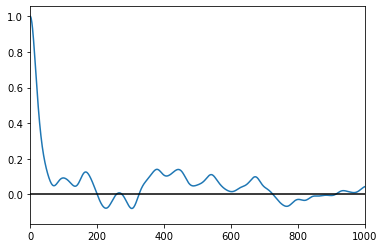

In [174]:
plt.plot(R/R.max())
plt.axhline(0, c="k")
plt.xlim(0, 1000)

In [175]:
# --> Define Hankel matrix function.
def Hankel(y, m):
    
    # --> Size of the Hankel matrix.
    n = len(y)-m
    
    # --> Create the container.
    H = np.empty((m, n))
    
    # --> Fill-in the rows.
    for i in range(m):
        H[i, :] = y[i:-m+i]
        
    return H

In [176]:
H = Hankel(obs[2000:], 250)

In [177]:
U, Σ, Vt = svd(H, full_matrices=False)

(0.0, 50.0)

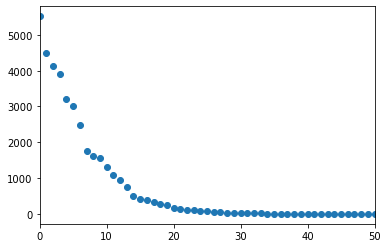

In [178]:
plt.plot(Σ, "o")
plt.xlim(0, 50)

(0.0, 50.0)

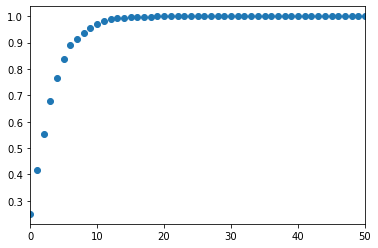

In [179]:
plt.plot(np.cumsum(Σ**2) / np.sum(Σ**2), "o")
plt.xlim(0, 50)

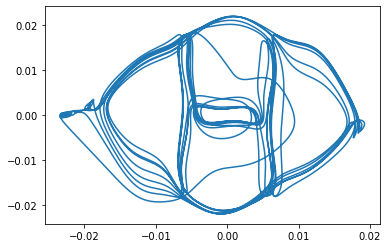

In [180]:
plt.plot(Vt[0], Vt[1])

In [181]:
from statsmodels.graphics.tsaplots import plot_pacf

(0.0, 20.0)

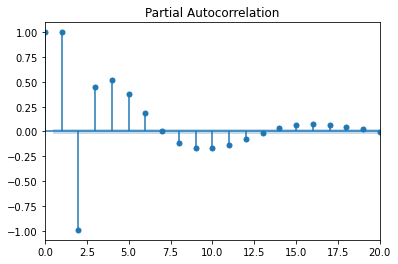

In [182]:
plot_pacf(obs[2000:], lags=100, method="ldbiased");
plt.xlim(0, 20)

In [190]:
H = Hankel(obs[2000:], 10)

In [191]:
U, Σ, Vt = svd(H, full_matrices=False)

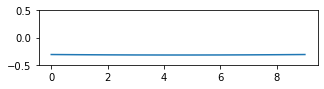

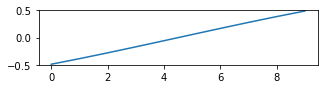

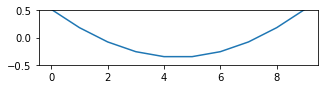

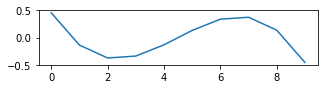

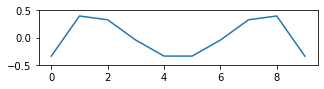

In [196]:
for i in range(5):
    plt.figure(figsize=(5, 1))
    plt.plot(U[:, i])
    plt.ylim(-0.5, 0.5)

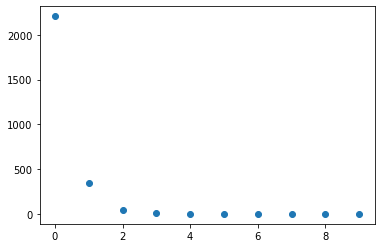

In [154]:
plt.plot(Σ, "o")

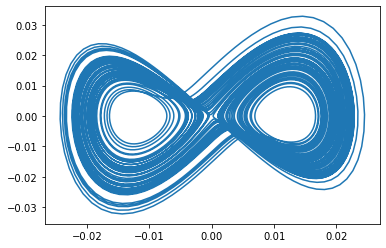

In [158]:
plt.plot(Vt[0], Vt[1])

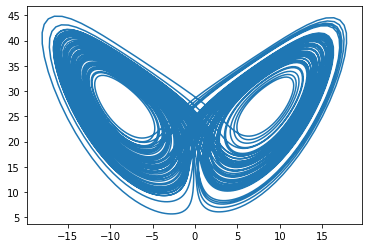

In [160]:
plt.plot(output["y"][0, 2000:], output["y"][2, 2000:])

In [165]:
H = Hankel(obs[2000:], 4000)

In [166]:
U, Σ, Vt = svd(H, full_matrices=False)

KeyboardInterrupt: 

In [ ]:
plt.plot(Vt[0])